# Подготовка

## Импорты

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras import Input
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential, load_model
from keras.utils.vis_utils import plot_model

## Данные

Загружаем датасет

In [2]:
pokemon = pd.read_csv("../data/Pokemon_preprocessed.csv", index_col=0)
pokemon.info()
pokemon.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Total       800 non-null    int64 
 2   HP          800 non-null    int64 
 3   Attack      800 non-null    int64 
 4   Defense     800 non-null    int64 
 5   Sp. Atk     800 non-null    int64 
 6   Sp. Def     800 non-null    int64 
 7   Speed       800 non-null    int64 
 8   Generation  800 non-null    int64 
 9   Legendary   800 non-null    bool  
 10  t_Bug       800 non-null    int64 
 11  t_Dark      800 non-null    int64 
 12  t_Dragon    800 non-null    int64 
 13  t_Electric  800 non-null    int64 
 14  t_Fairy     800 non-null    int64 
 15  t_Fighting  800 non-null    int64 
 16  t_Fire      800 non-null    int64 
 17  t_Flying    800 non-null    int64 
 18  t_Ghost     800 non-null    int64 
 19  t_Grass     800 non-null    int64 
 20  t_Ground  

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,t_Ghost,t_Grass,t_Ground,t_Ice,t_Normal,t_Poison,t_Psychic,t_Rock,t_Steel,t_Water
0,Bulbasaur,318,45,49,49,65,65,45,1,False,...,0,1,0,0,0,1,0,0,0,0
1,Ivysaur,405,60,62,63,80,80,60,1,False,...,0,1,0,0,0,1,0,0,0,0
2,Venusaur,525,80,82,83,100,100,80,1,False,...,0,1,0,0,0,1,0,0,0,0
3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1,False,...,0,1,0,0,0,1,0,0,0,0
4,Charmander,309,39,52,43,60,50,65,1,False,...,0,0,0,0,0,0,0,0,0,0


Разбиваем данные на параметры входные и целевые.

In [3]:
X = pokemon.drop(["Legendary","Name"], axis=1).values
y = pokemon.iloc[:, 9].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Обучение моделей

## Вариант модели №1

Без скрытых слоев

In [6]:
X.shape[1]

26

In [7]:
model_1 = Sequential()
model_1.add(Input(X.shape[1], name='InputLayer'))
model_1.add(Dense(1, activation='sigmoid', name='OutputLayer'))

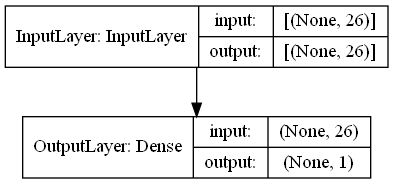

In [9]:
plot_model(model_1, show_shapes=True, to_file='../keras/model_1.png', show_layer_names=True)

In [10]:
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 1ms/step - loss: 0.8375 - accuracy: 0.5434
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.8463 - accuracy: 0.5278
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 0.8217 - accuracy: 0.5434
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8199 - accuracy: 0.5430
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.7586 - accuracy: 0.5838
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.7424 - accuracy: 0.5909
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.7570 - accuracy: 0.5760
Epoch 8/100
20/20 [==============================] - 0s 1000us/step - loss: 0.7357 - accuracy: 0.5772
Epoch 9/100
20/20 [==============================] - 0s 895us/step - loss: 0.6911 - accuracy: 0.6283
Epoch 10/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6574 - accuracy: 0.6399
Epoc

20/20 [==============================] - 0s 1ms/step - loss: 0.2860 - accuracy: 0.9508
Epoch 82/100
20/20 [==============================] - 0s 1ms/step - loss: 0.2878 - accuracy: 0.9494
Epoch 83/100
20/20 [==============================] - 0s 1ms/step - loss: 0.2873 - accuracy: 0.9433
Epoch 84/100
20/20 [==============================] - 0s 895us/step - loss: 0.2804 - accuracy: 0.9545
Epoch 85/100
20/20 [==============================] - 0s 1ms/step - loss: 0.2825 - accuracy: 0.9415
Epoch 86/100
20/20 [==============================] - 0s 947us/step - loss: 0.2808 - accuracy: 0.9351
Epoch 87/100
20/20 [==============================] - 0s 895us/step - loss: 0.2756 - accuracy: 0.9435
Epoch 88/100
20/20 [==============================] - 0s 895us/step - loss: 0.2830 - accuracy: 0.9389
Epoch 89/100
20/20 [==============================] - 0s 895us/step - loss: 0.2664 - accuracy: 0.9603
Epoch 90/100
20/20 [==============================] - 0s 947us/step - loss: 0.2711 - accuracy: 0.9540
E

In [14]:
 _ , accuracy = model_1.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

5/5 [==============================] - 0s 1ms/step - loss: 0.2338 - accuracy: 0.9375
Accuracy: 93.7500


## Вариант модели №2

1 скрытый слой с 5 нейронами и функцией активации - sigmoid.

In [19]:
model_2 = Sequential()
model_2.add(Input(X.shape[1], name='InputLayer'))
model_2.add(Dense(5, name='HiddenLayer1', activation='sigmoid'),)
model_2.add(Dense(1, activation='relu', name='OutputLayer'))

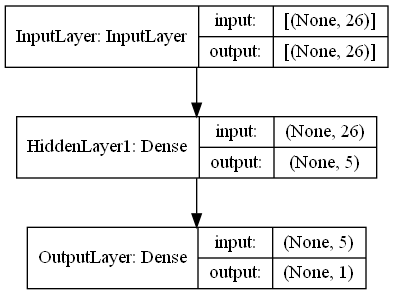

In [20]:
plot_model(model_2, show_shapes=True, to_file='../keras/model_2.png', show_layer_names=True)

In [23]:
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [24]:
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 1ms/step - loss: 1.2457 - accuracy: 0.9192
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.2344 - accuracy: 0.9200
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 1.2383 - accuracy: 0.9197
Epoch 4/100
20/20 [==============================] - 0s 1000us/step - loss: 0.9255 - accuracy: 0.9400
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 1.2354 - accuracy: 0.9199
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 1.1873 - accuracy: 0.9230
Epoch 7/100
20/20 [==============================] - 0s 947us/step - loss: 1.1445 - accuracy: 0.9258
Epoch 8/100
20/20 [==============================] - 0s 1ms/step - loss: 1.2091 - accuracy: 0.9216
Epoch 9/100
20/20 [==============================] - 0s 1000us/step - loss: 1.1240 - accuracy: 0.9271
Epoch 10/100
20/20 [==============================] - 0s 1000us/step - loss: 1.0470 - accuracy: 0.932

20/20 [==============================] - 0s 1ms/step - loss: 1.1886 - accuracy: 0.9229
Epoch 83/100
20/20 [==============================] - 0s 2ms/step - loss: 1.6893 - accuracy: 0.8905
Epoch 84/100
20/20 [==============================] - 0s 2ms/step - loss: 1.3574 - accuracy: 0.9120
Epoch 85/100
20/20 [==============================] - 0s 1ms/step - loss: 1.2342 - accuracy: 0.9200
Epoch 86/100
20/20 [==============================] - 0s 1ms/step - loss: 1.1635 - accuracy: 0.9246
Epoch 87/100
20/20 [==============================] - 0s 1ms/step - loss: 1.0399 - accuracy: 0.9326
Epoch 88/100
20/20 [==============================] - 0s 1000us/step - loss: 1.0653 - accuracy: 0.9309
Epoch 89/100
20/20 [==============================] - 0s 1ms/step - loss: 1.1400 - accuracy: 0.9261
Epoch 90/100
20/20 [==============================] - 0s 947us/step - loss: 1.3036 - accuracy: 0.9155
Epoch 91/100
20/20 [==============================] - 0s 1000us/step - loss: 1.0407 - accuracy: 0.9325
Epoch

In [26]:
_ , accuracy = model_2.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

5/5 [==============================] - 0s 1000us/step - loss: 1.3497 - accuracy: 0.9125
Accuracy: 91.2500


## Вариант модели №3

In [28]:
model_3 = Sequential()
model_3.add(Input(X.shape[1], name='InputLayer'))
model_3.add(Dense(6, name='HiddenLayer1', activation='sigmoid'),)
model_3.add(Dense(3, name='HiddenLayer2', activation='sigmoid'),)
model_3.add(Dense(1, activation='relu', name='OutputLayer'))

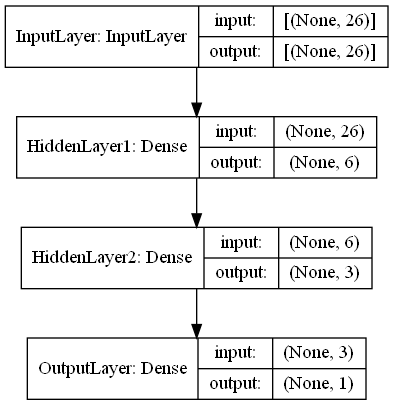

In [29]:
plot_model(model_3, show_shapes=True, to_file='../keras/model_3.png', show_layer_names=True)

In [30]:
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
20/20 [==============================] - 1s 1ms/step - loss: 1.0221 - accuracy: 0.9307
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.8385 - accuracy: 0.9400
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 1.1076 - accuracy: 0.9117
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.8526 - accuracy: 0.9286
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.8658 - accuracy: 0.9183
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.9683 - accuracy: 0.9066
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.7368 - accuracy: 0.9246
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.9252
Epoch 9/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4635 - accuracy: 0.9210
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.9193
Epoch 11/

20/20 [==============================] - 0s 1ms/step - loss: 0.1848 - accuracy: 0.9181
Epoch 83/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1844 - accuracy: 0.9122
Epoch 84/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1995 - accuracy: 0.9083
Epoch 85/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1955 - accuracy: 0.9091
Epoch 86/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1972 - accuracy: 0.9092
Epoch 87/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1684 - accuracy: 0.9285
Epoch 88/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1765 - accuracy: 0.9208
Epoch 89/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1651 - accuracy: 0.9270
Epoch 90/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1792 - accuracy: 0.9137
Epoch 91/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1954 - accuracy: 0.9108
Epoch 92/100


In [33]:
_ , accuracy = model_3.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

5/5 [==============================] - 0s 1ms/step - loss: 0.1806 - accuracy: 0.9125
Accuracy: 91.2500


## Вариант модели №4

In [88]:
model_4 = Sequential()
model_4.add(Input(X.shape[1], name='InputLayer'))
model_4.add(Dense(5, name='HiddenLayer1', activation='sigmoid'),)
model_4.add(Dense(4, name='HiddenLayer2', activation='sigmoid'),)
model_4.add(Dense(2, name='HiddenLayer3', activation='sigmoid'),)
model_4.add(Dense(1, activation='relu', name='OutputLayer'))

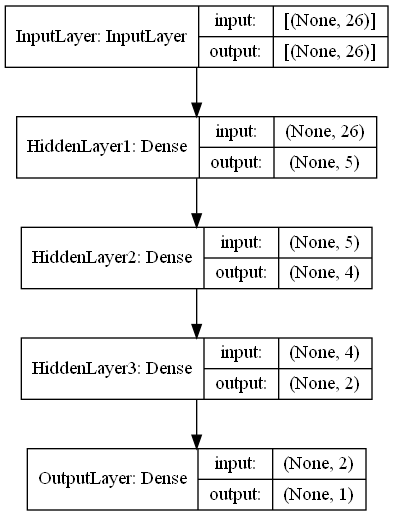

In [89]:
plot_model(model_4, show_shapes=True, to_file='../keras/model_4.png', show_layer_names=True)

In [90]:
model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [91]:
model_4.fit(X_train, y_train, epochs=150)

Epoch 1/150
20/20 [==============================] - 1s 1ms/step - loss: 0.9984 - accuracy: 0.0717
Epoch 2/150
20/20 [==============================] - 0s 1ms/step - loss: 0.8512 - accuracy: 0.0666
Epoch 3/150
20/20 [==============================] - 0s 1ms/step - loss: 0.7326 - accuracy: 0.1771
Epoch 4/150
20/20 [==============================] - 0s 1ms/step - loss: 0.6455 - accuracy: 0.8907
Epoch 5/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5733 - accuracy: 0.9273
Epoch 6/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.9121
Epoch 7/150
20/20 [==============================] - 0s 1ms/step - loss: 0.4703 - accuracy: 0.9135
Epoch 8/150
20/20 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.9274
Epoch 9/150
20/20 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.9320
Epoch 10/150
20/20 [==============================] - 0s 2ms/step - loss: 0.3597 - accuracy: 0.9218
Epoch 11/

Epoch 83/150
20/20 [==============================] - 0s 1ms/step - loss: 0.1319 - accuracy: 0.9141
Epoch 84/150
20/20 [==============================] - 0s 1ms/step - loss: 0.1186 - accuracy: 0.9179
Epoch 85/150
20/20 [==============================] - 0s 1ms/step - loss: 0.1329 - accuracy: 0.9084
Epoch 86/150
20/20 [==============================] - 0s 1ms/step - loss: 0.1413 - accuracy: 0.8938
Epoch 87/150
20/20 [==============================] - 0s 1ms/step - loss: 0.1306 - accuracy: 0.9123
Epoch 88/150
20/20 [==============================] - 0s 1ms/step - loss: 0.1194 - accuracy: 0.9141
Epoch 89/150
20/20 [==============================] - 0s 1ms/step - loss: 0.1347 - accuracy: 0.9087
Epoch 90/150
20/20 [==============================] - 0s 1ms/step - loss: 0.1088 - accuracy: 0.9217
Epoch 91/150
20/20 [==============================] - 0s 1ms/step - loss: 0.1173 - accuracy: 0.9169
Epoch 92/150
20/20 [==============================] - 0s 1ms/step - loss: 0.1189 - accuracy: 0.9165


In [92]:
_ , accuracy = model_4.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 0.9625
Accuracy: 96.2500


## Вывод

* Лучшее качество обеспечивает модель 4 (эксперимент №4).
* Время на обучение нейронной сети прямо пропорционально количеству эпох обучения.

# Сохранение модели

In [ ]:
model_4.save('../keras/model_4')